In [47]:
from traffic import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [48]:
Ncars = 30
positions = np.linspace(0, 1000, num=Ncars+1)
cars = [Car(positions[i]) for i in range(Ncars)]
for i in range(Ncars-1):
    cars[i].set_next(cars[i+1])
cars[Ncars-1].set_next(cars[0])

Above code establishes the array of cars needed

In [49]:
sim = Simulation(cars)
sim.run_once()

This snippet establishes the simulation and does a single round

In [50]:
sim.run(5)

Here, it is run for a few seconds

In [51]:
x_vals = np.linspace(0, Ncars, num=Ncars)

In [52]:
def plot_things():
    plt.plot(x_vals, sim.dist_array())
    plt.title("Distance to next car (m)")
    plt.xlabel("Car number")
    plt.ylabel("m")
    plt.show()

    plt.plot(x_vals, sim.speed_array())
    plt.title("Speed of car (m/s)")
    plt.xlabel("Car number")
    plt.ylabel("m/s")
    plt.axis((0,Ncars,0,35))
    plt.show()

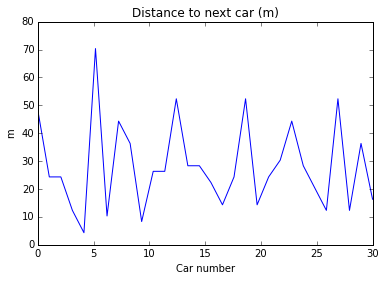

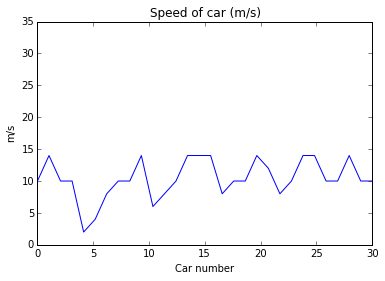

In [53]:
plot_things()

In [54]:
sim.run(60)

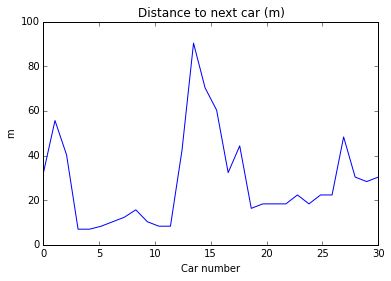

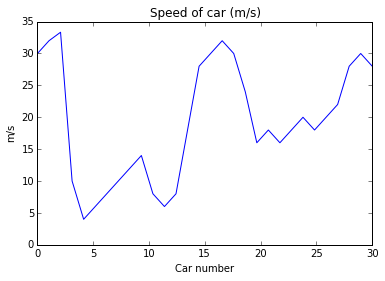

In [55]:
plot_things()

In [56]:
sim = Simulation(cars) # reset

In [60]:
Ntime = 2000
avg_speed = [0] * Ntime
time_plt = [i for i in range(Ntime)]
full_hist = [[0 for i in range(Ncars)] for j in range(Ntime)]
for i in range(Ntime):
    avg_speed[i] = sim.speed_array().mean()
    full_hist[i] = sim.pos_array()
    sim.run_once()

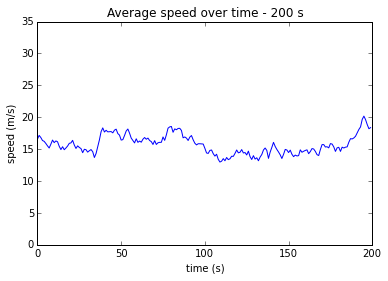

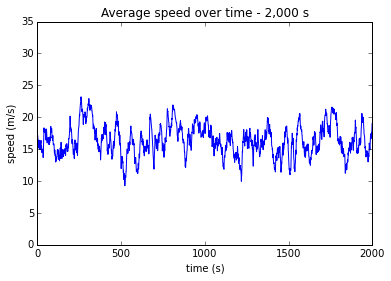

In [64]:
plt.plot(time_plt[:int(Ntime/10)], avg_speed[:int(Ntime/10)])
plt.title("Average speed over time - 200 s")
plt.xlabel("time (s)")
plt.ylabel("speed (m/s)")
plt.axis((0,int(Ntime/10),0,35))
plt.show()

plt.plot(time_plt, avg_speed)
plt.title("Average speed over time - 2,000 s")
plt.xlabel("time (s)")
plt.ylabel("speed (m/s)")
plt.axis((0,Ntime,0,35))
plt.show()

In [62]:
print(full_hist[0])

[  41.936        57.93633333   67.26166667   81.259        97.26233333
  109.26266667  121.265       133.26333333  145.25466667  159.259
  175.24733333  204.57966667  224.585       245.92933333  277.26666667
  308.597       420.59733333  466.59666667  518.604       557.27433333
  697.27366667  734.609       770.60633333  809.94066667  851.937
  896.60933333  937.27366667  977.269       994.60633333   26.60566667]


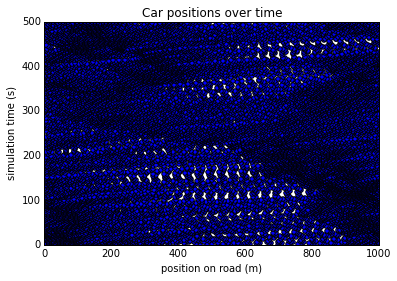

In [73]:
for k in range(500):
    plt.scatter(full_hist[k], [k for i in range(Ncars)])
plt.title("Car positions over time")
plt.xlabel("position on road (m)")
plt.ylabel("simulation time (s)")
plt.axis((0,1000,0,500))
plt.show()